# Linear Regression


## 什麼是線性回歸?

線性回歸（Linear regression）是統計上在找多個自變數(independent variable)和依變數(dependent variable)之間的關係建出來的模型。

只有一個自變數和一個依變數的情形稱為簡單線性回歸(Simple linear regression)，大於一個自變數的情形稱為多元回歸(multiple regression)。

一般回歸分析的介紹都會以簡單線性回歸為例子來說明

自變數(independent variable): 英文寫independent，中文翻譯叫做「獨立」，所以理論上這個變數是不被其他變數影響的，只會去影響別人，所以被認為是「因」(Cause)

依變數(dependent variable): 英文寫dependent，中文翻譯叫做「相依」，所以這個變數基本上是被其他變數影響的，被認為是「果」(effect)。
所以「因」影響「果」(因→果)

這樣如果還不懂，那白話一點，一個人的「長相」會因為她的「皮膚」、「身材」和「臉蛋」所影響，所以
* 依變數 (果) :「長相」
* 自變數 (因) :「皮膚」、「身材」和「臉蛋」。


所以線性回歸就是一種因果關係嗎? 應該說因果關係是一種線性回歸，但是線性回歸不是一種因果關係

> Granger 本人在2003年獲諾貝爾經濟學獎上演說格蘭傑因果關係檢驗的結論只是一種統計估計，不是真正意義上的因果關係，不能作爲肯定或否定因果關係的根據。但卻一堆「很多荒謬論文的出現」


舉例:

如果把依變數(果)換成「身高」，自變數(因)換成「體重」，這時候你會說「體重」去影響「身高」嗎？還是「身高」會影響「體重」。
所以因果關係的分析，其實不是單純在一個線性回歸就可以找到的。

這邊大概提一下，如果「因」會影響「果」，那建出來的模型應該要很好，模型好要怎麼評估→答案是看residual(r(x))大小吧，residual越小模型越好。所以假設我們要知道「身高」和「體重」哪個是因哪個是果。
應該就建兩個模型

$$「身高」=\theta_0 +\theta_1 * 「體重」+ residual_1 $$

$$「體重」=\beta_0 + \beta_1 * 「身高」+ residual_2 $$

如果 $reisual_2<residual_1$，代表用「身高去估計體重」會比「體重去估計身高」好
如果我們已經假設這兩個變數有因果關係，但不知道誰影響誰，可以透過上述方式說「身高是因，體重是果」，聽起來沒毛病。

所以又回歸一開始的定義:

線性回歸（Linear regression）是統計上在找多個自變數(independent variable)和依變數(dependent variable)之間的關係建出來的模型。

其關係只能說有相關性不代表存在因果關係。


[參考資料](https://medium.com/@chih.sheng.huang821/%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8-linear-regression-3a271a7453e)

所以我們按照上述定義可以簡單歸納線性回歸模型的公式

### 線性回歸公式:

### $$ \hat{y} = \theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2 .....\theta_n * x_n$$
### $$ x_0 = 1 $$

### 以線性代數表達:

### $$ \hat{y} = \theta \cdot X^T $$

當我們轉換成矩陣後，我們可以很輕易的求出矩陣 $\theta$:

### $$ \hat{\theta} = y \cdot X \cdot(X^T \cdot X)^{-1} $$

$ (X^T \cdot X)^{-1} $ 的目的是為了產生 N*N矩陣(N是特徵數量)才有辦法做Inverse

也就是說，理論上只要有資料我們就能直接求出他們之間的相關係數，然而實際上 DOT運算 的計算量非常大，
複雜度約$O(n^{2.4})$ ~ $O(n^3)$ ，特徵數量或資料筆數一多的時候計算會極度緩慢

In [1]:
import numpy as np


X = np.random.rand(100, 2)
X[:, 0] = 1
X = np.sort(X, axis = 0)
theta = np.array([1, 4]).reshape(-1, 2)
y = np.dot(theta , X.T)
y = y + np.random.normal(0, 1, y.shape)

print('X SHAPE: ', X.shape)
print(X[:3])
print('Y SHAPE: ', y.shape)
print(y[0, :3])


X SHAPE:  (100, 2)
[[1.         0.01246244]
 [1.         0.03442188]
 [1.         0.03485374]]
Y SHAPE:  (1, 100)
[ 0.40150771 -0.5252988   1.32865285]


原始權重:  [[1 4]]
公式預測權重:  [[0.87045893 4.19057496]]


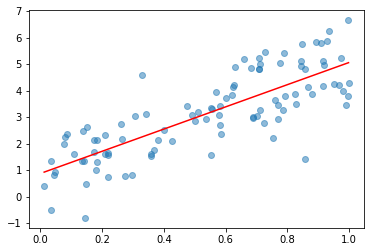

In [2]:
import matplotlib.pyplot as plt


print('原始權重: ', theta)

theta_hat = y.dot(X).dot(np.linalg.inv(X.T.dot(X)))
print('公式預測權重: ', theta_hat)


plt.scatter(x=X[:, 1].reshape(-1), y=y.reshape(-1), alpha=0.5)
plt.plot(X[:, 1].reshape(-1), np.dot(theta_hat , X.T).reshape(-1), color='r')
plt.show()

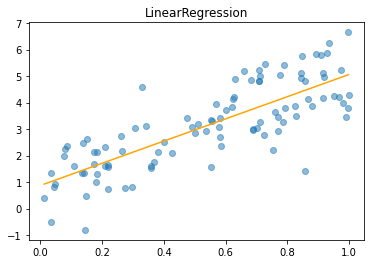

In [3]:
 # 以sklearn model 復現上面程式
    
from sklearn.linear_model import LinearRegression

net = LinearRegression()

# 資料處理
train_x = X[:, 1].reshape(-1, 1)
train_y = y.T.reshape(-1)

net.fit(train_x, train_y)
yhat = net.predict(train_x)

plt.scatter(x=X[:, 1].reshape(-1), y=y.reshape(-1), alpha=0.5)
plt.plot(train_x.reshape(-1), yhat.reshape(-1), color='orange')
plt.title('LinearRegression')

plt.show()

# SGD Regressor

眾所皆知直接計算的複雜度非常高，所幸我們可以採用數值逼近的方式降低複雜度，所付出的代價就是有機率陷入區域解

我們希望得到一個線性回歸模型使得所有的 $ f(\theta, X, y) = (\theta \cdot X^T -y)^2 $ 最小

而我們對於 X, y 為已知， $\frac{df(\theta, X, y)}{d\theta}$  是一種$d\theta$對$df()$變化量

我們可以利用這種方法 知道該對$\theta$做何種修正使得$\hat{y}$越來越小，這就是梯度下降法，SGD Regressor就是應用此修正法的Regressor

[參考資料](https://medium.com/@arlen.mg.lu/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E8%AC%9B%E4%B8%AD%E6%96%87-gradient-descent-b2a658815c72)

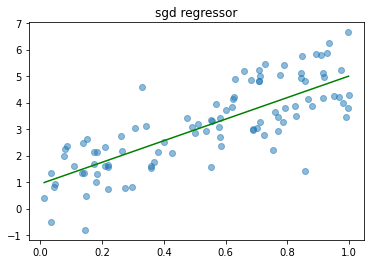

In [4]:
# sgd regressor by sklearn


from sklearn.linear_model import SGDRegressor

lr=0.1
net = SGDRegressor(max_iter=1000,  random_state=42, eta0=lr)

# 資料處理
train_x = X[:, 1].reshape(-1, 1)
train_y = y.T.reshape(-1)


net.fit(train_x, train_y)
yhat = net.predict(train_x)

plt.scatter(x=X[:, 1].reshape(-1), y=y.reshape(-1), alpha=0.5)
plt.plot(train_x.reshape(-1), yhat.reshape(-1), color='green')
plt.title('sgd regressor')

plt.show()
